In [1]:
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
D = np.array([[23,30.4], [21.1,33.9], [32,43.3], [19,29.1], [24.2,41.2], [18.3,31.7], [17.5,24.7], [33.5,41], [33.8,38.8], [30.7,40.1]])
x=[23, 21.1, 32, 19, 24.2, 18.3, 17.5, 33.5, 33.8, 30.7]
y=[30.4, 33.9, 43.3, 29.1, 41.2, 31.7, 24.7, 41, 38.8, 40.1]
k=2
Mx1=[21,33]
My1=[31,47]
cx=0.01

In [2]:
def Kmeans(x,y,cx,Mx,My):
    smes=np.inf
    while smes>cx:
        list1=[]
        list2=[]
        for i in range(len(x)):
            if ((x[i]-Mx[0])**2+(y[i]-My[0])**2)<((x[i]-Mx[1])**2+(y[i]-My[1])**2):
                list1=list1+[(x[i],y[i])]
            else:
                list2=list2+[(x[i],y[i])]
        sumx1,sumx2,sumy1,sumy2=0,0,0,0
        for i in range(len(list1)):
            sumx1+=list1[i][0]/len(list1)
            sumy1+=list1[i][1]/len(list1)
        for i in range(len(list2)):
            sumx2+=list2[i][0]/len(list2)
            sumy2+=list2[i][1]/len(list2)
        smes_c1=(sumx1-Mx[0])**2+(sumy1-My[0])**2
        smes_c2=(sumx2-Mx[1])**2+(sumy2-My[1])**2
        smes=smes_c1+smes_c2
        Mx=[round(sumx1,2),round(sumx2,2)]
        My=[round(sumy1,2),round(sumy2,2)]
    return Mx,My,list1,list2

In [3]:
Mx_new,My_new,list1,list2=Kmeans(x,y,cx,Mx1,My1)
print("Центроид первого кластера: ",[Mx_new[0],My_new[0]])
print("Кластер 1:",list1)
print("Центроид второго кластера: ",[Mx_new[1],My_new[1]])
print("Кластер 2:",list2)


Центроид первого кластера:  [19.78, 29.96]
Кластер 1: [(23, 30.4), (21.1, 33.9), (19, 29.1), (18.3, 31.7), (17.5, 24.7)]
Центроид второго кластера:  [30.84, 40.88]
Кластер 2: [(32, 43.3), (24.2, 41.2), (33.5, 41), (33.8, 38.8), (30.7, 40.1)]


In [4]:
def grafic(x,y,cx,Mx,My):
    Mx,My,list1,list2=Kmeans(x,y,cx,Mx,My)
    plt.subplots(figsize=(10, 6))
    for i in range(len(list1)):
        plt.plot(list1[i][0],list1[i][1],'ro')
        plt.text(list1[i][0]+0.5,list1[i][1]-0.5,f"({list1[i][0],list1[i][1]})")
    for i in range(len(list2)):
        plt.plot(list2[i][0],list2[i][1],'bo')
        plt.text(list2[i][0]+0.5,list2[i][1]-0.5,f"({list2[i][0],list2[i][1]})")
    plt.plot(Mx[0],My[0],'yo')
    plt.text(Mx[0]+0.5,My[0]+0.2,"(centre C1)")
    plt.plot(Mx[1],My[1],'ko')
    plt.text(Mx[1]+0.5,My[1]+0.2,"(centre C2)")

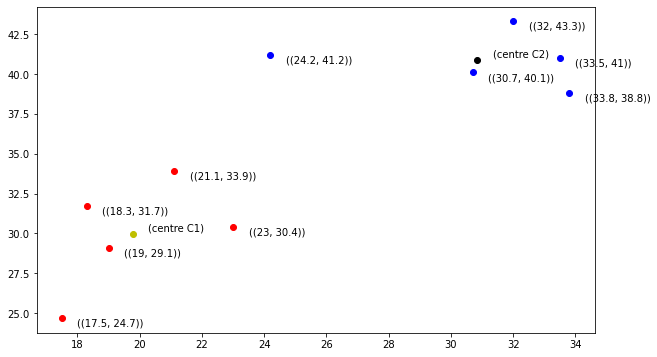

In [5]:
grafic(x,y,cx,Mx1,My1)

[[19.78 29.96]
 [30.84 40.88]]


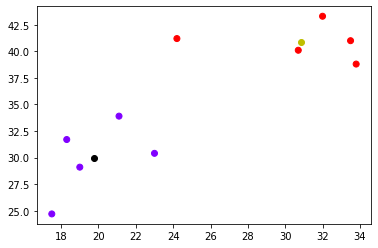

In [6]:
kmeans=KMeans(n_clusters=k)
kmeans.fit(D)
print(kmeans.cluster_centers_)
plt.scatter(D[:,0],D[:,1], c=kmeans.labels_, cmap='rainbow')
plt.plot(kmeans.cluster_centers_[0][0],kmeans.cluster_centers_[0][1],'ko')
plt.plot(kmeans.cluster_centers_[1][0],kmeans.cluster_centers_[1][1],'yo')
plt.show()

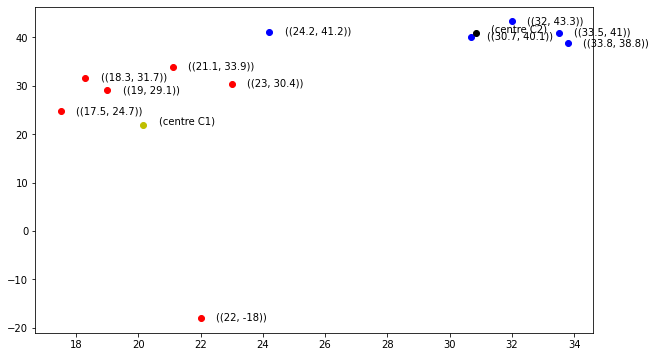

In [7]:
x=x+[22]
y=y+[-18]
grafic(x,y,cx,Mx1,My1)

In [8]:
from scipy. stats import norm
x_1=[5.7,15.6,6.7,2.7,1.4,15.8,4.1,6.9,15.7,9.9]
p1=[0.2,1,0.2,0.1,0.1,1,0.1,0.3,1,0.9]
p2=[0.8,0,0.0,0.9,0.9,0,0.9,0.7,0,0.1]
s1,s1_1,s2,s2_2=0,0,0,0
for i in range(len(x_1)):
    s1+=p1[i]*x_1[i]
    s2+=p2[i]*x_1[i]
nu1=s1/(sum(p1))
nu2=s2/(sum(p2))
print("Оценка максимального правдоподобия для среднего 1:",nu1)
print("Оценка максимального правдоподобия для среднего 2:",nu2)
nu1_1=11
nu2_2=4.9
sko=3.8
sko2=2.1
pc1=0.4
pc2=0.6
x1=6.9
p_xc1 = norm.pdf(x1,nu1_1,sko)
p_xc2= norm.pdf(x1,nu2_2,sko2)
pc1_x=(p_xc1*pc1)/(p_xc1*pc1+p_xc2*pc2)
pc2_x=(p_xc2*pc2)/(p_xc1*pc1+p_xc2*pc2)
print("Вероятность принадлежности к 1 кластеру:",pc1_x)
print("Вероятность принадлежности к 2 кластеру:",pc2_x)

Оценка максимального правдоподобия для среднего 1: 12.526530612244896
Оценка максимального правдоподобия для среднего 2: 4.130232558139535
Вероятность принадлежности к 1 кластеру: 0.24470078513861504
Вероятность принадлежности к 2 кластеру: 0.755299214861385


In [9]:
data = [
[0,1,1,1,0],
[1,0,1,0,1],
[0,1,0,1,0],
[0,1,1,1,1],
[0,1,0,0,0],
[0,1,1,1,1]]

In [10]:
points=[[3, 8], [3, 7], [4, 7], [5, 8], [2, 7], [4, 8], [19, 1], [6, 8], [1, 7], [9, 2], [2, 8],
              [2, 6], [1, 8], [4, 3], [17, 1], [17, 10], [17, 9], [8, 3], [9, 9], [16, 1], [6, 7],
              [10, 8], [10, 1], [2, 5], [16, 2]]

In [11]:
def GetNeighbours(x,et,dist):
    all_neighbours=[]
    for i in range(len(x)):
        neighbours=[]
        for j in range(len(x)):
            if (i!=j)&(dist(x[i],x[j])<=et):
                neighbours+=[j]
        all_neighbours+=[neighbours]
    return all_neighbours
        
                

In [12]:
def DensityConnected(p, et, minsp, points, cluster, visited,neighbours):
    cluster+=[p]
    visited+=[p]
    if len(neighbours[p])>=minsp:
        for n in neighbours[p]:
            if n not in visited:
                visited,cluster=DensityConnected(n, et, minsp, points, cluster, visited,neighbours)
            
    return visited, cluster

In [13]:
def DBScan(x,et,dist,minsp):
    core=[]
    noise=[]
    border=[]
    neighbours=GetNeighbours(x,et,dist)
    for i in range(len(x)):
        if (len(neighbours[i]))>=minsp:
            core+=[i]
    visited=[]
    clusters=[]
    for p in core:
        if p not in visited:
            cl=[]
            cl,visited=DensityConnected(p, et, minsp, points, cl, visited,neighbours)
            clusters+=[cl]
    visit=[]
    for i in visited:
        visit+=[x[i]]
    for k in points:
        if k not in visit:
            noise+=[k]
    print(noise)
    for k in visit:
        if k not in core:
            border+=[k]
    print(border)
    return clusters,core,border,noise

In [14]:
def metric1(x,y):
    metric=np.sqrt((x[0]-y[0])**2)+np.sqrt((x[1]-y[1])**2)
    return metric

[[19, 1], [9, 2], [4, 3], [17, 1], [17, 10], [17, 9], [8, 3], [9, 9], [16, 1], [10, 8], [10, 1], [16, 2]]
[[3, 8], [3, 7], [4, 7], [5, 8], [4, 8], [6, 8], [2, 8], [2, 7], [1, 7], [2, 6], [2, 5], [1, 8], [6, 7]]


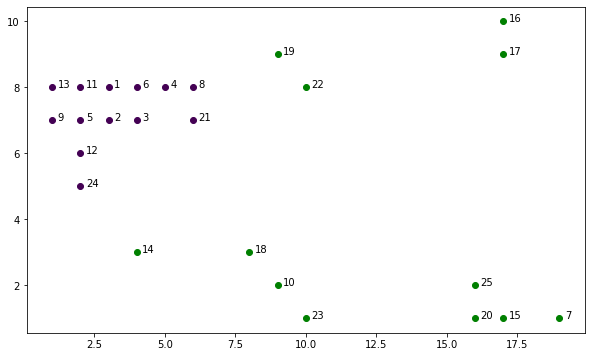

In [15]:
x=[3,3,4,5,2,4,19,6,1,9,2,2,1,4,17,17,17,8,9,16,6,10,10,2,16]
y=[8,7,7,8,7,8,1,8,7,2,8,6,8,3,1,10,9,3,9,1,7,8,1,5,2]
clusters,core,border,noise=DBScan(points,2,metric1,5)
fig,ax = plt.subplots(figsize=(10, 6))
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        ax.scatter(x[clusters[i][j]],y[clusters[i][j]],c=i)
for i in range(len(noise)):
    ax.plot(noise[i][0],noise[i][1],'go')
for i in range(len(points)):
    plt.annotate(i+1,(points[i][0]+0.2,points[i][1]))
plt.show()

In [16]:
def metric2(x,y):
    metric=np.sqrt(np.abs(x[0] - y[0]))**2+np.sqrt(np.abs(x[1] - y[1]))**2
    return metric

[[19, 1], [9, 2], [17, 1], [17, 10], [17, 9], [8, 3], [16, 1], [10, 1], [16, 2]]
[[3, 8], [3, 7], [4, 7], [5, 8], [2, 7], [4, 8], [6, 8], [2, 8], [1, 7], [2, 6], [1, 8], [2, 5], [9, 9], [6, 7], [10, 8], [4, 3]]


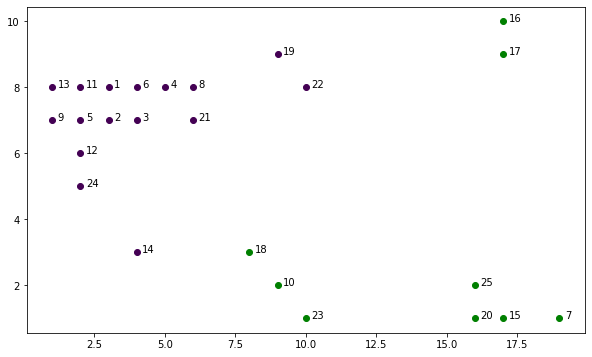

In [17]:
clusters,core,border,noise=DBScan(points,4,metric2,4)
fig,ax = plt.subplots(figsize=(10, 6))
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        ax.scatter(x[clusters[i][j]],y[clusters[i][j]],c=i)
for i in range(len(noise)):
    ax.plot(noise[i][0],noise[i][1],'go')
for i in range(len(points)):
    plt.annotate(i+1,(points[i][0]+0.2,points[i][1]))
plt.show()

In [18]:
def metric3(x,y):
    metric=max(abs(x[0]-y[0]),abs(x[1]-y[1]))
    return metric

[[3, 8], [3, 7], [4, 7], [5, 8], [2, 7], [4, 8], [6, 8], [1, 7], [9, 2], [2, 8], [2, 6], [1, 8], [4, 3], [17, 10], [17, 9], [8, 3], [9, 9], [6, 7], [10, 8], [10, 1], [2, 5]]
[[16, 2], [19, 1], [17, 1], [16, 1]]


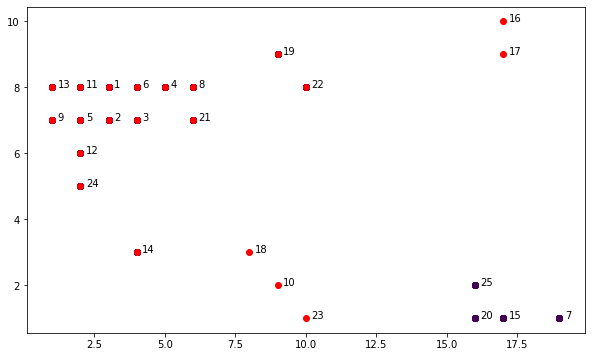

In [19]:
clusters,core,border,noise=DBScan(points,3,metric3,3)
fig,ax = plt.subplots(figsize=(10, 6))
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        ax.scatter(x[clusters[i][j]],y[clusters[i][j]],c=i)
for i in range(len(noise)):
    ax.plot(noise[i][0],noise[i][1],'ro')
for i in range(len(points)):
    plt.annotate(i+1,(points[i][0]+0.2,points[i][1]))
plt.show()